In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

# Uploading dataset

In [2]:
df=pd.read_csv('covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


# Data analysis

In [3]:
df.shape

(566602, 23)

In [4]:
#to find the datatypes of all columns. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
#Calculating basic stats related to columns
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [6]:
#checking for null values
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

# Feature description
id - The identification number of the patient.

sex - Identifies the sex of the patient. (Female - 1, Male - 2)

patient_type - Identifies the type of care received by the patient in the unit. It is called an outpatient if you returned home or it is called an inpatient if you were admitted to hospital. (Outpatient - 1, Inpatient - 2)

entry_date - Identifies the date of the patient's admission to the care unit.

date_symptoms - Identifies the date on which the patient's symptoms began.

date_died - Identifies the date the patient died. (“9999-99-99” stands for recovered)

intubed - Identifies if the patient required intubation. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

pneumonia - Identifies if the patient was diagnosed with pneumonia. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

age - Identifies the age of the patient.

pregnancy - Identifies if the patient is pregnant. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

diabetes - Identifies if the patient has a diagnosis of diabetes. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

copd - Identifies if the patient has a diagnosis of Chronic obstructive pulmonary disease (COPD). (Yes - 1, No - 2, Data missing or NA - 97,98,99)

asthma - Identifies if the patient has a diagnosis of asthma. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

inmsupr - Identifies if the patient has immunosuppression (weakened immune system). (Yes - 1, No - 2, Data missing or NA - 97,98,99)

hypertension - Identifies if the patient has a diagnosis of hypertension. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

other_disease - Identifies if the patient has a diagnosis of other diseases. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

cardiovascular - Identifies if the patient has a diagnosis of cardiovascular disease. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

obesity - Identifies if the patient is diagnosed with obesity. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

renal_chronic - Identifies if the patient has a diagnosis of chronic kidney failure. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

tobacco - Identifies if the patient is a tobacco user. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

contact_other_covid - Identifies if the patient had contact with other Covid19 patient. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

covid_res - The result of the test. (Positive - 1, Negative - 2, Awaiting Results - 3)

icu - Identifies if the patient required to enter an Intensive Care Unit. (Yes - 1, No - 2, Data missing or NA - 97,98,99)


# Preprocessing Data

In [7]:
#converting the feature encoding in binary number
#converting female(1) and male(2) into binary female(0) and male(1)
df2=df['sex'].replace([1,2],[0,1],inplace=True)

In [8]:
# Convert outpatient(1) and inpatient(2) values into outpatient(0) and inpatient(1)
df2=df['patient_type'].replace([1,2],[0,1],inplace=True)

In [9]:
# Convert yes(1) and no(2) values into yes(1) and no(0)
columns = ['intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu']

#convert no(2) values into no(0)
binary_columns = df[columns].replace(2,0).replace([97,98,99],2)


#relacing all the missing values [97,98,99]into 2
#binary_columns = df[columns].replace([97,98,99],2)

#dropping the original columns
df2 = df.drop(columns,axis=1)

df2[columns] = binary_columns
df2.reindex(columns=list(df.columns)).head()


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,04-05-2020,02-05-2020,9999-99-99,2,0,27,2,...,0,0,0,0,0,0,0,0,1,2
1,1009bf,1,0,19-03-2020,17-03-2020,9999-99-99,2,0,24,2,...,0,0,0,0,0,0,0,2,1,2
2,167386,0,1,06-04-2020,01-04-2020,9999-99-99,0,0,54,0,...,0,0,0,0,1,0,0,2,1,0
3,0b5948,1,1,17-04-2020,10-04-2020,9999-99-99,0,1,30,2,...,0,0,0,0,0,0,0,2,1,0
4,0d01b5,0,1,13-04-2020,13-04-2020,22-04-2020,0,0,60,0,...,0,1,0,1,0,0,0,2,1,0


In [10]:
# Repla result of the test to (Negative - 0, Positive - 1, Awaiting Results - 2)
df2['covid_res'].replace([2,3],[0,2],inplace=True)

In [11]:
df2

,id,sex,patient_type,entry_date,date_symptoms,date_died,age,covid_res,intubed,pneumonia,...,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,16169f,1,0,04-05-2020,02-05-2020,9999-99-99,27,1,2,0,...,0,0,0,0,0,0,0,0,0,2
1,1009bf,1,0,19-03-2020,17-03-2020,9999-99-99,24,1,2,0,...,0,0,0,0,0,0,0,0,2,2
2,167386,0,1,06-04-2020,01-04-2020,9999-99-99,54,1,0,0,...,0,0,0,0,0,1,0,0,2,0
3,0b5948,1,1,17-04-2020,10-04-2020,9999-99-99,30,1,0,1,...,0,0,0,0,0,0,0,0,2,0
4,0d01b5,0,1,13-04-2020,13-04-2020,22-04-2020,60,1,0,0,...,0,0,1,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,1,0,13-05-2020,03-05-2020,9999-99-99,58,2,2,0,...,0,0,0,0,0,0,0,0,0,2
566598,047cd1,0,0,07-04-2020,06-04-2020,9999-99-99,48,2,2,0,...,0,0,0,0,0,0,0,0,0,2
566599,1beb81,0,1,14-05-2020,01-05-2020,9999-99-99,49,2,0,1,...,0,0,0,0,0,1,0,0,2,0
566600,16fb02,0,0,31-05-2020,29-05-2020,9999-99-99,43,2,2,1,...,0,0,0,0,0,0,0,0,0,2


###### After encoding the data into binary number i.e [0,1] and converting all the missing i.e [97,98,99] into 2.We have neglected the missing values and plotted a bar chart of each column.
##### 0- No
##### 1-Yes
##### except for sex and patient type, 
##### for sex, 0=Female and 1= Male
##### for patient type, 0=outpatient and 1=inpatient


In [12]:
lst=df2.columns
for i in range(19):
    print(df2[lst[i]].value_counts().to_frame())
    print("----------------")

           id
0.00E+00  210
1.56E+03    9
1.50E+09    9
1.80E+07    9
1.78E+03    8
...       ...
1e2239      1
0b52dd      1
14d74a      1
0684dc      1
117a20      1

[563201 rows x 1 columns]
----------------
      sex
1  287112
0  279490
----------------
   patient_type
0        444689
1        121913
----------------
            entry_date
15-06-2020       13261
16-06-2020       12776
23-06-2020       12556
22-06-2020       12378
12-06-2020       12151
...                ...
01-02-2020           8
08-02-2020           8
04-01-2020           6
11-01-2020           5
01-01-2020           5

[181 rows x 1 columns]
----------------
            date_symptoms
01-06-2020          13860
15-06-2020          13601
10-06-2020          12875
20-06-2020          12212
08-06-2020          11160
...                   ...
04-01-2020             19
21-02-2020             19
03-01-2020             16
31-01-2020             15
19-02-2020             14

[181 rows x 1 columns]
----------------
      

Text(0.5, 1.0, 'Sex')

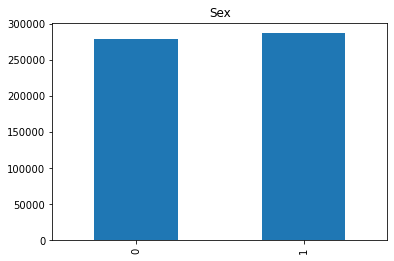

In [13]:
df2=df2[df2['sex']!=2]
df2['sex'].value_counts().sort_index().plot.bar()
plt.title('Sex')

Text(0.5, 1.0, 'Patient_type')

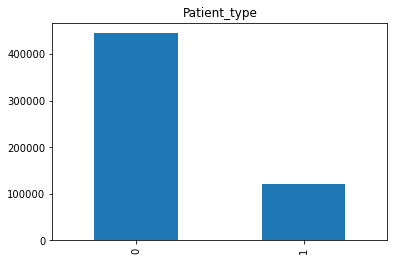

In [14]:
df2=df2[df2['patient_type']!=2]
df2['patient_type'].value_counts().sort_index().plot.bar()
plt.title('Patient_type')

Text(0.5, 1.0, 'Intubed')

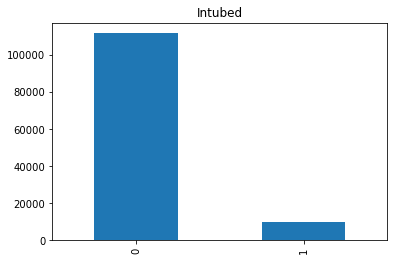

In [15]:
df2=df2[df2['intubed']!=2]
df2['intubed'].value_counts().sort_index().plot.bar()
df2['intubed'].value_counts().to_frame()
plt.title('Intubed')

In [16]:
df2=df2[df2['intubed']!=2]
df2['intubed'].value_counts().to_frame()

,intubed
0,111824
1,9965


Text(0.5, 1.0, 'Pneumonia')

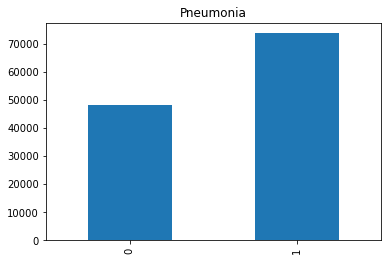

In [17]:
df2=df2[df2['pneumonia']!=2]
df2['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('Pneumonia')

In [18]:
df2=df2[df2['pneumonia']!=2]
df2['pneumonia'].value_counts().to_frame()

,pneumonia
1,73689
0,48100


Text(0.5, 1.0, 'Pregnancy')

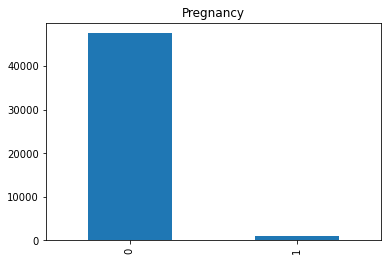

In [19]:
df2=df2[df2['pregnancy']!=2]
df2['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Pregnancy')

In [20]:
df2=df2[df2['pregnancy']!=2]
df2['pregnancy'].value_counts().to_frame()

,pregnancy
0,47555
1,1069


Text(0.5, 1.0, 'Diabetes')

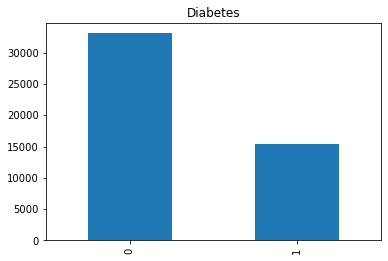

In [21]:
df2=df2[df2['diabetes']!=2]
df2['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

In [22]:
df2=df2[df2['diabetes']!=2]
df2['diabetes'].value_counts().to_frame()

,diabetes
0,33078
1,15330


Text(0.5, 1.0, 'Copd')

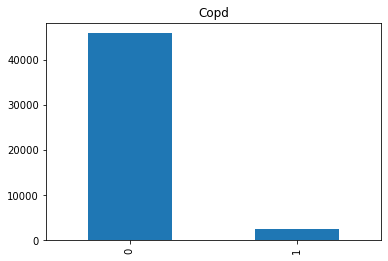

In [23]:
df2=df2[df2['copd']!=2]
df2['copd'].value_counts().sort_index().plot.bar()
plt.title('Copd')

In [24]:
df2=df2[df2['copd']!=2]
df2['copd'].value_counts().to_frame()

,copd
0,45895
1,2490


Text(0.5, 1.0, 'Asthma')

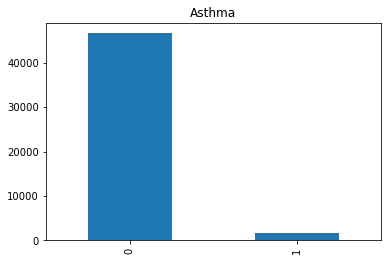

In [25]:
df2=df2[df2['asthma']!=2]
df2['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asthma')

In [26]:
df2=df2[df2['asthma']!=2]
df2['asthma'].value_counts().to_frame()

,asthma
0,46616
1,1758


Text(0.5, 1.0, 'Inmsupr')

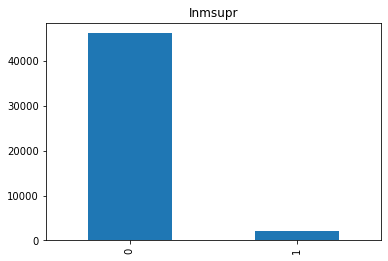

In [27]:
df2=df2[df2['inmsupr']!=2]
df2['inmsupr'].value_counts().sort_index().plot.bar()
plt.title('Inmsupr')

In [28]:
df2=df2[df2['inmsupr']!=2]
df2['inmsupr'].value_counts().to_frame()

,inmsupr
0,46143
1,2187


Text(0.5, 1.0, 'Hypertension')

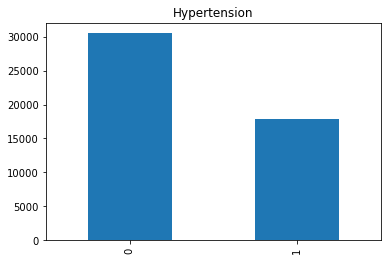

In [29]:
df2=df2[df2['hypertension']!=2]
df2['hypertension'].value_counts().sort_index().plot.bar()
plt.title('Hypertension')

In [30]:
df2=df2[df2['hypertension']!=2]
df2['hypertension'].value_counts().to_frame()

,hypertension
0,30475
1,17844


Text(0.5, 1.0, 'Other_disease')

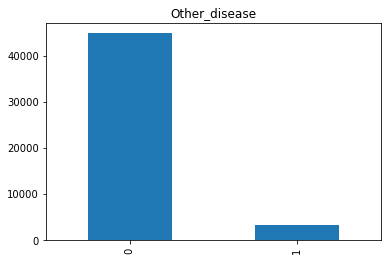

In [31]:
df2=df2[df2['other_disease']!=2]
df2['other_disease'].value_counts().sort_index().plot.bar()
plt.title('Other_disease')

In [32]:
df2=df2[df2['other_disease']!=2]
df2['other_disease'].value_counts().to_frame()

,other_disease
0,44797
1,3382


Text(0.5, 1.0, 'Cardiovascular')

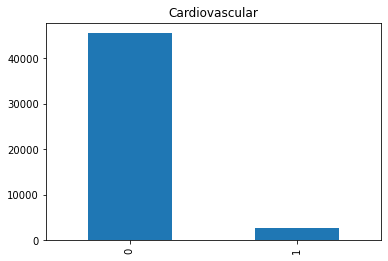

In [33]:
df2=df2[df2['cardiovascular']!=2]
df2['cardiovascular'].value_counts().sort_index().plot.bar()
plt.title('Cardiovascular')

In [34]:
df2=df2[df2['cardiovascular']!=2]
df2['cardiovascular'].value_counts().to_frame()

,cardiovascular
0,45503
1,2662


Text(0.5, 1.0, 'Obesity')

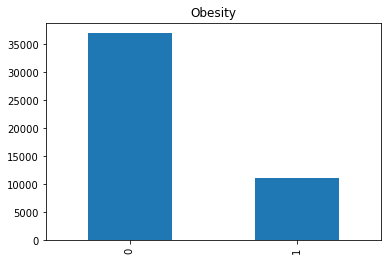

In [35]:
df2=df2[df2['obesity']!=2]
df2['obesity'].value_counts().sort_index().plot.bar()
plt.title('Obesity')

In [36]:
df2=df2[df2['obesity']!=2]
df2['obesity'].value_counts().to_frame()

,obesity
0,36974
1,11139


Text(0.5, 1.0, 'Renal Chronic')

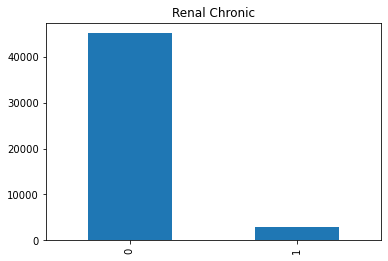

In [37]:
df2=df2[df2['renal_chronic']!=2]
df2['renal_chronic'].value_counts().sort_index().plot.bar()
plt.title('Renal Chronic')

In [38]:
df2=df2[df2['renal_chronic']!=2]
df2['renal_chronic'].value_counts().to_frame()

,renal_chronic
0,45078
1,3021


Text(0.5, 1.0, 'Tobacco')

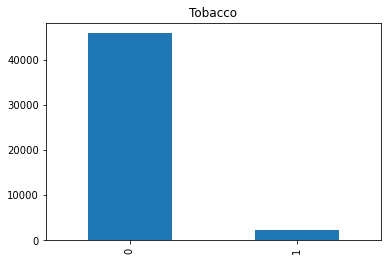

In [39]:
df2=df2[df2['tobacco']!=2]
df2['tobacco'].value_counts().sort_index().plot.bar()
plt.title('Tobacco')

In [40]:
df2=df2[df2['tobacco']!=2]
df2['tobacco'].value_counts().to_frame()

,tobacco
0,45843
1,2228


Text(0.5, 1.0, 'Contact other covid')

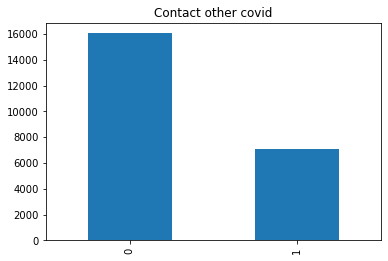

In [41]:
df2=df2[df2['contact_other_covid']!=2]
df2['contact_other_covid'].value_counts().sort_index().plot.bar()
plt.title('Contact other covid')

In [42]:
df2=df2[df2['contact_other_covid']!=2]
df2['contact_other_covid'].value_counts().to_frame()

,contact_other_covid
0,16059
1,7099


Text(0.5, 1.0, 'Icu')

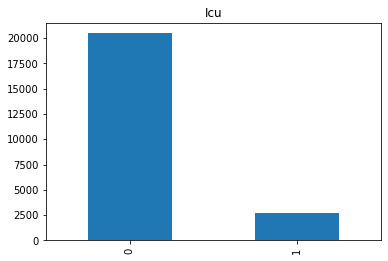

In [43]:
df2=df2[df2['icu']!=2]
df2['icu'].value_counts().sort_index().plot.bar()
plt.title('Icu')

In [44]:
df2=df2[df2['icu']!=2]
df2['icu'].value_counts().to_frame()

,icu
0,20460
1,2698
